In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DS2OS.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357952 entries, 0 to 357951
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sourceID                   357952 non-null  object
 1   sourceAddress              357952 non-null  object
 2   sourceType                 357952 non-null  object
 3   sourceLocation             357952 non-null  object
 4   destinationServiceAddress  357952 non-null  object
 5   destinationServiceType     357952 non-null  object
 6   destinationLocation        357952 non-null  object
 7   accessedNodeAddress        357952 non-null  object
 8   accessedNodeType           357804 non-null  object
 9   operation                  357952 non-null  object
 10  value                      355902 non-null  object
 11  timestamp                  357952 non-null  int64 
 12  normality                  357952 non-null  object
dtypes: int64(1), object(12)
memory usage: 35.5+ 

In [3]:
from sklearn.model_selection import train_test_split

fraction_to_keep = 0.2  # Adjust this fraction as needed

# Assuming 'target' is the name of your target variable (labels)
original_labels = df['normality']

# Perform stratified sampling
df, _ = train_test_split(df, train_size=fraction_to_keep, stratify=original_labels)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71590 entries, 97165 to 211235
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   sourceID                   71590 non-null  object
 1   sourceAddress              71590 non-null  object
 2   sourceType                 71590 non-null  object
 3   sourceLocation             71590 non-null  object
 4   destinationServiceAddress  71590 non-null  object
 5   destinationServiceType     71590 non-null  object
 6   destinationLocation        71590 non-null  object
 7   accessedNodeAddress        71590 non-null  object
 8   accessedNodeType           71568 non-null  object
 9   operation                  71590 non-null  object
 10  value                      71193 non-null  object
 11  timestamp                  71590 non-null  int64 
 12  normality                  71590 non-null  object
dtypes: int64(1), object(12)
memory usage: 7.6+ MB


In [5]:
unique_value_counts = df.nunique()
unique_value_counts

sourceID                        82
sourceAddress                   86
sourceType                       8
sourceLocation                  21
destinationServiceAddress       81
destinationServiceType           8
destinationLocation             21
accessedNodeAddress            126
accessedNodeType                11
operation                        5
value                         9195
timestamp                    70276
normality                        8
dtype: int64

### fill Missing values 

In [6]:
df.loc[df['value'] == 'twenty', "value"] = 20.0
df.loc[df['value'] == 'false', "value"] = 0
df.loc[df['value'] == 'true', "value"] = 1
df.loc[df['value'] == 'none', "value"] = 0
df.loc[df['value'] == '0', "value"] = 0.0
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df['value'].fillna(50.0)
df['value'] = df['value'].astype(float)

In [7]:
df['accessedNodeType'] = df['accessedNodeType'].fillna (value="/Malicious")

### remove duplication

In [8]:
duplicate_rows = df[df.duplicated()]
df = df.drop_duplicates()

In [9]:
del df['timestamp']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71485 entries, 97165 to 211235
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sourceID                   71485 non-null  object 
 1   sourceAddress              71485 non-null  object 
 2   sourceType                 71485 non-null  object 
 3   sourceLocation             71485 non-null  object 
 4   destinationServiceAddress  71485 non-null  object 
 5   destinationServiceType     71485 non-null  object 
 6   destinationLocation        71485 non-null  object 
 7   accessedNodeAddress        71485 non-null  object 
 8   accessedNodeType           71485 non-null  object 
 9   operation                  71485 non-null  object 
 10  value                      71485 non-null  float64
 11  normality                  71485 non-null  object 
dtypes: float64(1), object(11)
memory usage: 7.1+ MB


In [11]:
df = df.replace({True: 1, False: 0})
df = df.fillna(0)

In [12]:
unique_value_counts = df.nunique()
unique_value_counts

sourceID                       82
sourceAddress                  86
sourceType                      8
sourceLocation                 21
destinationServiceAddress      81
destinationServiceType          8
destinationLocation            21
accessedNodeAddress           126
accessedNodeType               12
operation                       5
value                        9188
normality                       8
dtype: int64

In [13]:
#sourceID
unique_sourceID = sorted(df.sourceID.unique())
string1 = 'sourceID_'
unique_sourceID2 = [string1 + str(x) for x in unique_sourceID]

#sourceAddress
unique_sourceAddress = sorted(df.sourceAddress.unique())
string1 = 'sourceAddress_'
unique_sourceAddress2 = [string1 + str(x) for x in unique_sourceAddress]

#sourceType
unique_sourceType = sorted(df.sourceType.unique())
string1 = 'sourceType_'
unique_sourceType2 = [string1 + str(x) for x in unique_sourceType]

#sourceLocation
unique_sourceLocation = sorted(df.sourceLocation.unique())
string1 = 'sourceLocation_'
unique_sourceLocation2 = [string1 + str(x) for x in unique_sourceLocation]

#destinationServiceAddress
unique_destinationServiceAddress = sorted(df.destinationServiceAddress.unique())
string1 = 'destinationServiceAddress_'
unique_destinationServiceAddress2 = [string1 + str(x) for x in unique_destinationServiceAddress]

#destinationServiceType
unique_destinationServiceType = sorted(df.destinationServiceType.unique())
string1 = 'destinationServiceType_'
unique_destinationServiceType2 = [string1 + str(x) for x in unique_destinationServiceType]

#destinationLocation
unique_destinationLocation = sorted(df.destinationLocation.unique())
string1 = 'destinationLocation_'
unique_destinationLocation2 = [string1 + str(x) for x in unique_destinationLocation]

#accessedNodeAddress
unique_accessedNodeAddress = sorted(df.accessedNodeAddress.unique())
string1 = 'accessedNodeAddress_'
unique_accessedNodeAddress2 = [string1 + str(x) for x in unique_accessedNodeAddress]

#accessedNodeType
unique_accessedNodeType = sorted(df.accessedNodeType.unique())
string1 = 'accessedNodeType_'
unique_accessedNodeType2 = [string1 + str(x) for x in unique_accessedNodeType]

#operation
unique_operation = sorted(df.operation.unique())
string1 = 'operation_'
unique_operation2 = [string1 + str(x) for x in unique_operation]

#value
unique_value = sorted(df.value.unique())
string1 = 'value_'
unique_value2 = [string1 + str(x) for x in unique_value]


In [14]:
# ADD TOGETHER
dumcols = (
    unique_sourceID2 + unique_sourceAddress2 + unique_sourceType2 +
    unique_sourceLocation2 + unique_destinationServiceAddress2 +
    unique_destinationServiceType2 + unique_destinationLocation2 +
    unique_accessedNodeAddress2 + unique_accessedNodeType2 +
    unique_operation2 + unique_value2
)
dumcols

['sourceID_battery1',
 'sourceID_battery2',
 'sourceID_battery3',
 'sourceID_battery4',
 'sourceID_battery5',
 'sourceID_battery6',
 'sourceID_doorlock1',
 'sourceID_doorlock2',
 'sourceID_doorlock4',
 'sourceID_heatingcontrol1',
 'sourceID_heatingcontrol2',
 'sourceID_heatingcontrol3',
 'sourceID_heatingcontrol4',
 'sourceID_lightcontrol1',
 'sourceID_lightcontrol10',
 'sourceID_lightcontrol11',
 'sourceID_lightcontrol12',
 'sourceID_lightcontrol13',
 'sourceID_lightcontrol14',
 'sourceID_lightcontrol2',
 'sourceID_lightcontrol20',
 'sourceID_lightcontrol21',
 'sourceID_lightcontrol22',
 'sourceID_lightcontrol23',
 'sourceID_lightcontrol24',
 'sourceID_lightcontrol25',
 'sourceID_lightcontrol26',
 'sourceID_lightcontrol27',
 'sourceID_lightcontrol28',
 'sourceID_lightcontrol29',
 'sourceID_lightcontrol3',
 'sourceID_lightcontrol4',
 'sourceID_lightcontrol5',
 'sourceID_lightcontrol6',
 'sourceID_lightcontrol7',
 'sourceID_movement1',
 'sourceID_movement10',
 'sourceID_movement11',
 's

### label encoding

In [15]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is a pandas DataFrame
df = df.apply(LabelEncoder().fit_transform)
df

,sourceID,sourceAddress,sourceType,sourceLocation,destinationServiceAddress,destinationServiceType,destinationLocation,accessedNodeAddress,accessedNodeType,operation,value,normality
97165,16,17,2,5,19,3,5,31,5,1,0,7
324484,22,40,2,14,41,4,14,64,8,1,182,7
41203,23,43,2,15,43,3,15,68,5,1,0,7
356939,62,21,4,1,16,1,5,26,3,4,1,2
178134,31,74,2,7,71,3,7,110,5,1,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
10428,3,8,0,10,7,0,10,13,3,1,0,7
19039,62,21,4,1,23,4,1,38,8,4,581,7
189498,20,34,2,11,33,3,11,53,5,1,1,7
272584,19,28,2,3,30,4,3,48,8,1,4285,7


### one-hot encoder

In [16]:
import pandas as pd


# Create a DataFrame with all the columns from dumcols
dummy_df = pd.DataFrame(columns=dumcols)

# Add the corresponding columns to dummy_df
dummy_df[unique_sourceID2] = pd.get_dummies(df['sourceID'])
dummy_df[unique_sourceAddress2] = pd.get_dummies(df['sourceAddress'])
dummy_df[unique_sourceType2] = pd.get_dummies(df['sourceType'])
dummy_df[unique_sourceLocation2] = pd.get_dummies(df['sourceLocation'])
dummy_df[unique_destinationServiceAddress2] = pd.get_dummies(df['destinationServiceAddress'])
dummy_df[unique_destinationServiceType2] = pd.get_dummies(df['destinationServiceType'])
dummy_df[unique_destinationLocation2] = pd.get_dummies(df['destinationLocation'])
dummy_df[unique_accessedNodeAddress2] = pd.get_dummies(df['accessedNodeAddress'])
dummy_df[unique_accessedNodeType2] = pd.get_dummies(df['accessedNodeType'])
dummy_df[unique_operation2] = pd.get_dummies(df['operation'])
dummy_df[unique_value2] = pd.get_dummies(df['value'])

# Convert dummy_df to have 0s and 1s instead of False and True
dummy_df = dummy_df.astype(int)

# Concatenate dummy_df with the original DataFrame
df = pd.concat([df, dummy_df], axis=1)

# Drop the original columns that have been one-hot encoded
df.drop(['sourceID', 'sourceAddress', 'sourceType', 'sourceLocation',
         'destinationServiceAddress', 'destinationServiceType', 'destinationLocation',
         'accessedNodeAddress', 'accessedNodeType', 'operation', 'value'], axis=1, inplace=True)


In [17]:
unique_value_counts = df.nunique()
unique_value_counts

normality                8
sourceID_battery1        2
sourceID_battery2        2
sourceID_battery3        2
sourceID_battery4        2
                        ..
value_1521225110950.0    2
value_1521225130382.0    2
value_1521225141620.0    2
value_1521225171505.0    2
value_1521225172554.0    2
Length: 9639, dtype: int64

In [18]:
df

,normality,sourceID_battery1,sourceID_battery2,sourceID_battery3,sourceID_battery4,sourceID_battery5,sourceID_battery6,sourceID_doorlock1,sourceID_doorlock2,sourceID_doorlock4,...,value_1521224892193.0,value_1521224902930.0,value_1521225012495.0,value_1521225068816.0,value_1521225100882.0,value_1521225110950.0,value_1521225130382.0,value_1521225141620.0,value_1521225171505.0,value_1521225172554.0
97165,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
324484,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41203,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
356939,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178134,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10428,7,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19039,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
189498,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272584,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Normalization

In [19]:
xdf = df.drop('normality', axis=1)
ydf = df["normality"]

In [20]:
# Get the column names before MinMax normalization
column_names = xdf.columns

In [21]:
xdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71485 entries, 97165 to 211235
Columns: 9638 entries, sourceID_battery1 to value_1521225172554.0
dtypes: int32(9638)
memory usage: 2.6 GB


In [22]:
from tensorflow.keras import preprocessing
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

In [23]:
dense_array = xdf.astype('int16').values

In [24]:
# Now you can use 'dense_array' where dense data is required
scaler = MinMaxScaler()
# Apply MinMaxScaler directly to the numeric DataFrame
xdf = scaler.fit_transform(dense_array)

In [25]:
xdf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### feature selection

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xdf, ydf, test_size=0.2, random_state=42)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Use SelectKBest with the f_classif scoring function
k_best = SelectKBest(score_func=f_classif, k=500)

# Fit and transform the training data
X_train = k_best.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [column_names[i] for i in selected_feature_indices]

# Display the selected features
print("Selected Features:", selected_feature_names)

# Transform the testing set
X_test = k_best.transform(X_test)


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [  34  111  209  327  372  406  412  444  460  498  499  502  530  531
  545  554  586  596  660  664  666  669  703  704  709  718  719  801
  812  847  883  887  896  899  908  909  914  923  941 1024 1036 1040
 1047 1049 1055 1102 1110 1112 1162 1181 1182 1191 1200 1204 1210 1211
 1228 1241 1252 1276 1293 1324 1341 1345 1349 1350 1399 1410 1453 1498
 1527 1530 1532 1533 1540 1568 1605 1624 1643 1654 1681 1684 1689 1722
 1758 1763 1768 1782 1803 1806 1807 1819 1826 1840 1875 1883 1886 1909
 1985 1993 2000 2012 2015 2034 2053 2129 2140 2197 2240 2258 2259 2274
 2275 2276 2279 2280 2293 2303 2315 2329 2344 2351 2359 2389 2402 2421
 2424 2466 2496 2515 2516 2522 2530 2536 2554 2582 2597 2610 2626 2650
 2670 2683 2687 2689 2705 2738 2767 2783 2795 2798 2803 2824 2847 2848
 2851 2871 2905 2940 2959 3008 3014 3025 3050 3062 3067 3084 3095 3163
 3172 3188 3190 3211 3221 3

Selected Features: ['sourceID_battery1', 'sourceID_battery2', 'sourceID_battery3', 'sourceID_battery4', 'sourceID_battery5', 'sourceID_battery6', 'sourceID_doorlock1', 'sourceID_doorlock2', 'sourceID_doorlock4', 'sourceID_heatingcontrol1', 'sourceID_heatingcontrol2', 'sourceID_heatingcontrol3', 'sourceID_heatingcontrol4', 'sourceID_lightcontrol1', 'sourceID_lightcontrol10', 'sourceID_lightcontrol11', 'sourceID_lightcontrol12', 'sourceID_lightcontrol13', 'sourceID_lightcontrol14', 'sourceID_lightcontrol2', 'sourceID_lightcontrol20', 'sourceID_lightcontrol21', 'sourceID_lightcontrol22', 'sourceID_lightcontrol23', 'sourceID_lightcontrol24', 'sourceID_lightcontrol25', 'sourceID_lightcontrol26', 'sourceID_lightcontrol27', 'sourceID_lightcontrol28', 'sourceID_lightcontrol29', 'sourceID_lightcontrol3', 'sourceID_lightcontrol4', 'sourceID_lightcontrol5', 'sourceID_lightcontrol6', 'sourceID_lightcontrol7', 'sourceID_movement11', 'sourceID_movement14', 'sourceID_movement2', 'sourceID_movement20'

### LGBM-IDS

In [77]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import time


# Create the LGBMClassifier with the specified parameters
model = lgb.LGBMClassifier(
   boosting_type='gbdt',
   max_depth=2,
   n_estimators=100,
   num_leaves=3,
   learning_rate=0.05,
   
)

# Record the start time
start_time = time.time()

# Train the LGBM model
model.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the run-time
run_time = end_time - start_time
print("Run-Time in seconds:", run_time)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007942 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 57188, number of used features: 302
[LightGBM] [Info] Start training from score -4.217132
[LightGBM] [Info] Start training from score -6.965115
[LightGBM] [Info] Start training from score -5.956887
[LightGBM] [Info] Start training from score -6.133818
[LightGBM] [Info] Start training from score -5.486039
[LightGBM] [Info] Start training from score -6.584652
[LightGBM] [Info] Start training from score -7.909577
[LightGBM] [Info] Start training from score -0.026687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Run-Time in seconds: 5.807414770126343
Accuracy: 0.995383646918934
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       211
     

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Define class_names
class_names = {
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal'
}

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print ROC AUC for each class
for i, class_name in class_names.items():
    print(f"{class_name} - ROC AUC: {roc_auc[i]}")


anomalous(DoS attack) - ROC AUC: 0.9989719549443399
anomalous(data probing) - ROC AUC: 1.0
anomalous(malicious control) - ROC AUC: 1.0
anomalous(malicious operation) - ROC AUC: 1.0
anomalous(scan) - ROC AUC: 0.9999989958730382
anomalous(spying) - ROC AUC: 1.0
anomalous(wrong setup) - ROC AUC: 1.0
normal - ROC AUC: 0.9994111749927529


In [30]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize


# Binarize the labels for each class
y_test_bin = label_binarize(y_test, classes=list(class_names.keys()))

# Get the predicted probabilities for each class
y_prob = model.predict_proba(X_test)

# Compute micro-averaged ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_prob.ravel())

# Compute micro-averaged AUC
roc_auc_micro = auc(fpr_micro, tpr_micro)

print(f"Micro-Averaged ROC AUC: {roc_auc_micro}")


Micro-Averaged ROC AUC: 0.9999925651517003


In [31]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate overall accuracy
overall_accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {overall_accuracy}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Overall Accuracy: 0.9954535916625865
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82       211
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00        37
           4       0.99      0.99      0.99        70
           5       1.00      1.00      1.00        27
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00     13904

    accuracy                           1.00     14297
   macro avg       1.00      0.96      0.98     14297
weighted avg       1.00      1.00      1.00     14297



In [55]:
import time

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()

runtime = end_time - start_time
print('Runtime: %.3f seconds' % runtime)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006781 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 57188, number of used features: 302
[LightGBM] [Info] Start training from score -4.217132
[LightGBM] [Info] Start training from score -6.965115
[LightGBM] [Info] Start training from score -5.956887
[LightGBM] [Info] Start training from score -6.133818
[LightGBM] [Info] Start training from score -5.486039
[LightGBM] [Info] Start training from score -6.584652
[LightGBM] [Info] Start training from score -7.909577
[LightGBM] [Info] Start training from score -0.026687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Runtime: 7.217 seconds


### ERROR-RATE PERFORMANCE

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error:", mae)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error:", mse)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 0.036860879904875146
Mean Squared Error: 0.25596278939637684
Root Mean Squared Error: 0.5059276523341819


### VALIDATION

In [34]:
from sklearn.model_selection import cross_val_score
import numpy as np
import time

# Perform cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Calculate the mean accuracy
mean_accuracy = np.mean(scores)
print("Mean Accuracy:", mean_accuracy)

# Calculate the standard deviation of the scores
std_dev = np.std(scores)
print("Standard Deviation:", std_dev)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.017978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 594
[LightGBM] [Info] Number of data points in the train set: 45750, number of used features: 297
[LightGBM] [Info] Start training from score -4.216234
[LightGBM] [Info] Start training from score -6.969747
[LightGBM] [Info] Start training from score -5.960262
[LightGBM] [Info] Start training from score -6.135827
[LightGBM] [Info] Start training from score -5.483923
[LightGBM] [Info] Start training from score -6.587812
[LightGBM] [Info] Start training from score -7.897734
[LightGBM] [Info] Start training from score -0.026692
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006991 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 586
[LightGBM] [Info] Number of data points in the train set: 45750, number of used feat

In [56]:
import time

# Record the start time
start_time = time.time()

# Fit the model on the selected features
model.fit(X_train, y_train)

# Record the end time
end_time = time.time()

# Calculate the run-time
run_time = end_time - start_time
print("Run-Time in seconds:", run_time)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 604
[LightGBM] [Info] Number of data points in the train set: 57188, number of used features: 302
[LightGBM] [Info] Start training from score -4.217132
[LightGBM] [Info] Start training from score -6.965115
[LightGBM] [Info] Start training from score -5.956887
[LightGBM] [Info] Start training from score -6.133818
[LightGBM] [Info] Start training from score -5.486039
[LightGBM] [Info] Start training from score -6.584652
[LightGBM] [Info] Start training from score -7.909577
[LightGBM] [Info] Start training from score -0.026687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Run-Time in seconds: 6.304991006851196


In [36]:
# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Calculate the TPDR
tpdr = np.mean(y_train_pred == y_train)
print("Threat Prediction and Detection Rate:", tpdr)


Threat Prediction and Detection Rate: 0.9946317409246695


In [37]:
from sklearn.metrics import classification_report

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Compute the classification report
report = classification_report(y_train, y_train_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

           0       1.00      0.65      0.79       843
           1       1.00      1.00      1.00        54
           2       1.00      1.00      1.00       148
           3       1.00      1.00      1.00       124
           4       0.97      0.99      0.98       237
           5       0.99      1.00      0.99        79
           6       1.00      1.00      1.00        21
           7       0.99      1.00      1.00     55682

    accuracy                           0.99     57188
   macro avg       0.99      0.95      0.97     57188
weighted avg       0.99      0.99      0.99     57188



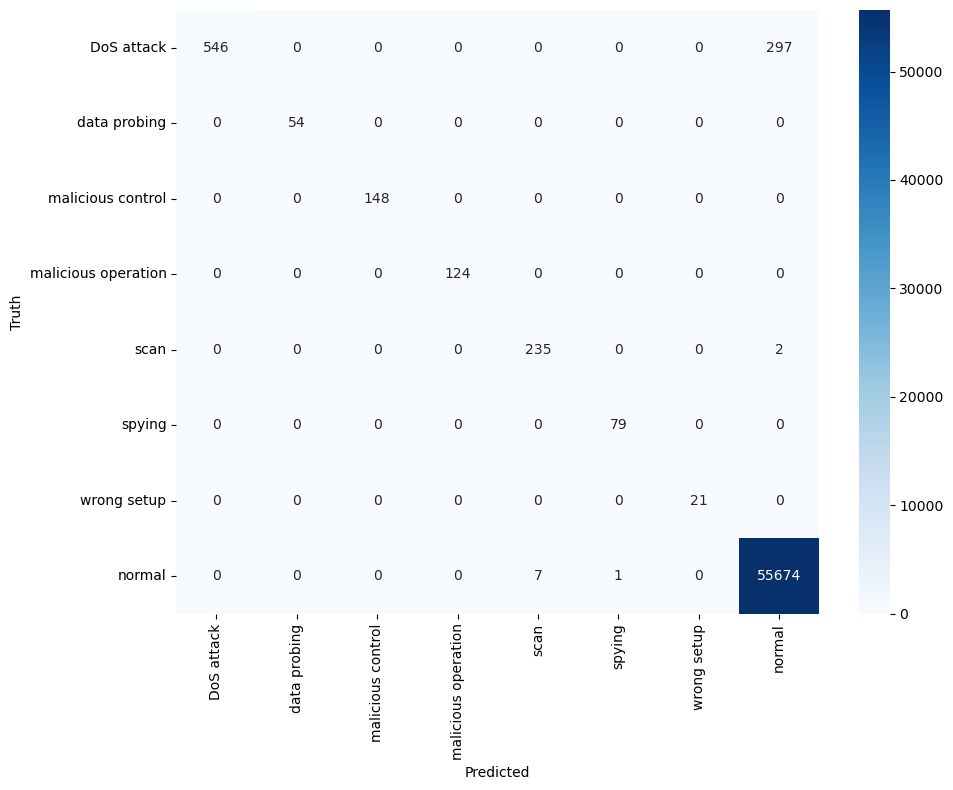

In [38]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Define class names
class_names = {
    0: 'DoS attack',
    1: 'data probing',
    2: 'malicious control',
    3: 'malicious operation',
    4: 'scan',
    5: 'spying',
    6: 'wrong setup',
    7: 'normal'
}

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix with class names
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names.values(), yticklabels=class_names.values())
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig('confusionMatrix_ids.png')
plt.show()


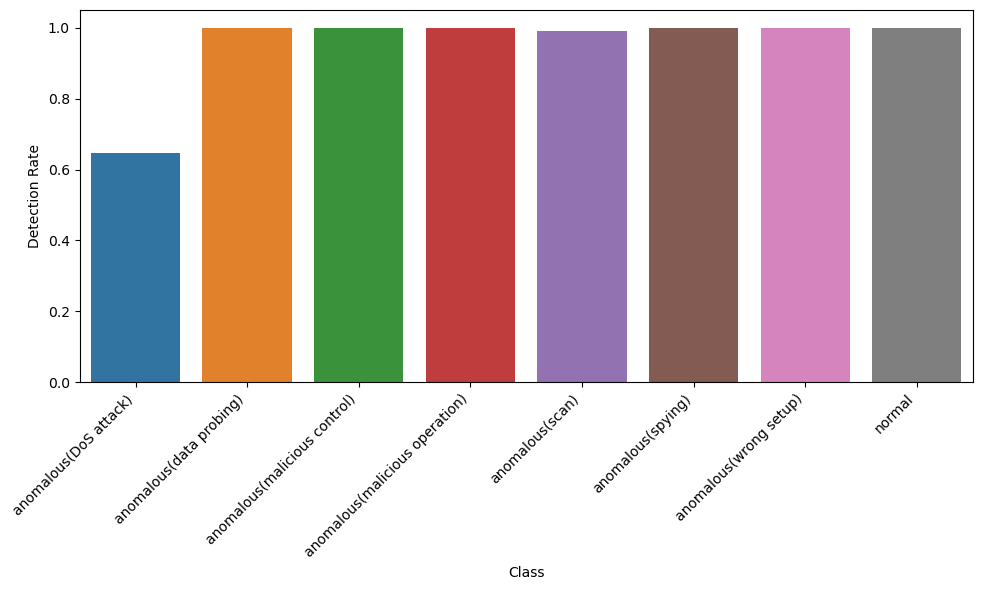

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define the class names
class_names = {
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal'
}

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Compute the confusion matrix
cm = confusion_matrix(y_train, y_train_pred)

# Calculate the threat detection rate for each class
detection_rate = cm.diagonal() / cm.sum(axis=1)

# Create a list of class labels
class_labels = list(range(8))  # Assuming there are 8 classes

# Create a bar plot with class names on the x-axis
plt.figure(figsize=(10, 6))
sns.barplot(x=[class_names[label] for label in class_labels], y=detection_rate)
#plt.title('Threat Detection Rate for Each Class')
plt.xlabel('Class')
plt.ylabel('Detection Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Adjust the layout and set a higher DPI
plt.tight_layout()
plt.savefig('detection_rate_barplot.png', dpi=300)  # Adjust the DPI as needed

# Show the plot
plt.show()


In [40]:
from sklearn.metrics import precision_recall_fscore_support

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Compute precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_train, y_train_pred, average=None)

# Print the precision, recall, and F1-score for each class
for i in range(8): # Assuming there are 8 classes
   print(f"Class {i}: Precision = {precision[i]}, Recall = {recall[i]}, F1-score = {f1_score[i]}")


Class 0: Precision = 1.0, Recall = 0.6476868327402135, F1-score = 0.7861771058315336
Class 1: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 2: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 3: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 4: Precision = 0.9710743801652892, Recall = 0.9915611814345991, F1-score = 0.9812108559498955
Class 5: Precision = 0.9875, Recall = 1.0, F1-score = 0.9937106918238994
Class 6: Precision = 1.0, Recall = 1.0, F1-score = 1.0
Class 7: Precision = 0.9946581387454666, Recall = 0.9998563269997486, F1-score = 0.9972504590031794


<Figure size 1200x800 with 0 Axes>

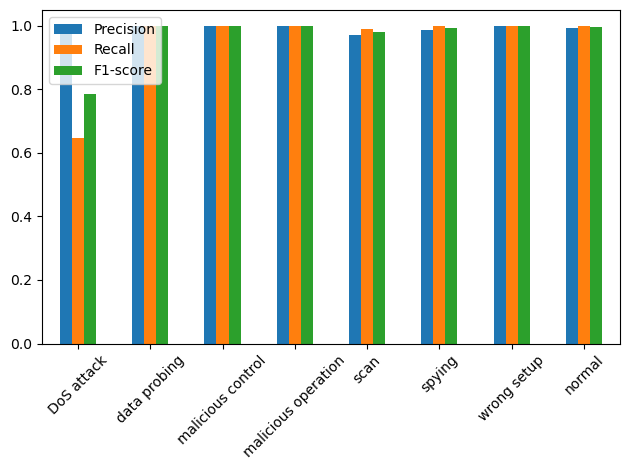

In [41]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import matplotlib.pyplot as plt

# Define the class names
class_names = {
    0: 'DoS attack',
    1: 'data probing',
    2: 'malicious control',
    3: 'malicious operation',
    4: 'scan',
    5: 'spying',
    6: 'wrong setup',
    7: 'normal'
}

# Make predictions on the training set
y_train_pred = model.predict(X_train)

# Compute precision, recall, F1-score, and support for each class
precision, recall, f1_score, support = precision_recall_fscore_support(y_train, y_train_pred, average=None)

# Create a DataFrame with class names
df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-score': f1_score
}, index=[class_names[label] for label in range(8)])  # Using class names as index

# Plot the DataFrame
plt.figure(figsize=(12, 8))
ax = df.plot.bar(rot=45)

# Adjust layout for better visibility
plt.tight_layout()

# Save the figure with higher DPI
plt.savefig('precision_recall_f1_score_barplot.png', dpi=300)

# Show the plot
plt.show()


### ROC-AOC

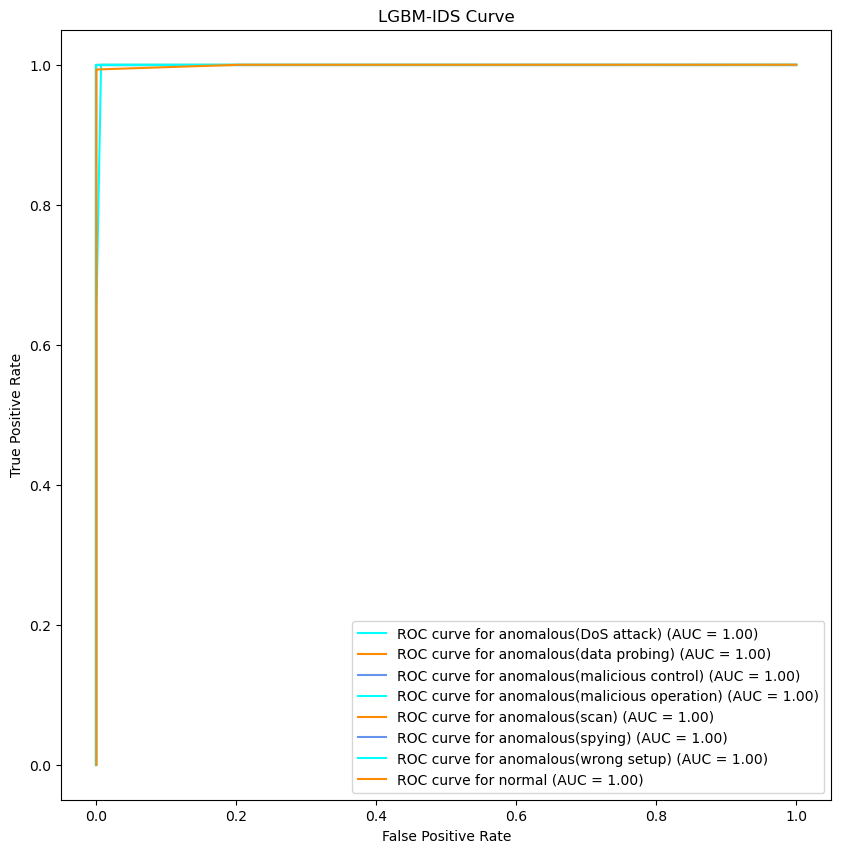

In [42]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Calculate the probabilities of the positive class
y_train_prob =model.predict_proba(X_train)

# Binarize the output
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3, 4, 5, 6, 7])

# Determine the number of classes
n_classes = y_train_bin.shape[1]

# Initialize dictionaries for ROC curve data and AUC scores
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate the TPR and FPR for each binary classification problem
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], y_train_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Define a dictionary mapping class indices to attack names
attack_names = {
    0: 'anomalous(DoS attack)',
    1: 'anomalous(data probing)',
    2: 'anomalous(malicious control)',
    3: 'anomalous(malicious operation)',
    4: 'anomalous(scan)',
    5: 'anomalous(spying)',
    6: 'anomalous(wrong setup)',
    7: 'normal'
}

from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Iterate over each class
for i, color in zip(range(n_classes), colors):
    # Use scikit-learn's RocCurveDisplay.from_predictions to generate ROC curve data and display it
    RocCurveDisplay.from_predictions(
        y_train_bin[:, i],  # True binary labels for the ith class
        y_train_prob[:, i],  # Estimated probabilities for the ith class
        name=f"ROC curve for {attack_names[i]}",  # Label for the curve
        color=color,  # Color for the curve
        ax=ax,  # Use the same axis for all curves
    )

# Set axis properties
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("LGBM-IDS Curve")
plt.legend(loc="lower right")  # Add legend in the lower-right corner
# Save the figure to a file
fig.savefig("LGBM-ids.png")

plt.show()
